#### Importing libraries

In [1]:
import math, keras, datetime, pandas as pd, numpy as np, keras.backend as K
import matplotlib.pyplot as plt, operator, random, pickle
# from utils2 import *
from isoweek import Week
from pandas_summary import DataFrameSummary
from IPython.display import SVG
from numpy import mean, sqrt, square, arange

In [2]:
np.set_printoptions(threshold=50, edgeitems=20)

#### Importing datasets

All the data is collected and displayed, considering both the useful and unuseful data.

In [3]:
PATH = '/Users/paolovalentini/Desktop/Python_Files/rossmann/'

In [4]:
table_names = ['train', 'store', 'store_states', 'state_names', 'googletrend', 'weather']
train, store, store_states, state_names, googletrend, weather = [pd.read_csv(PATH + fname+'.csv', 
                                                                             low_memory=False) for fname in table_names]

Display of the 5 row to understand the setup of the dataset

In [5]:
display(train.head())
display(DataFrameSummary(train).summary())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


/var/folders/4x/xqpfkttj3sl7nfzt1typb50w0000gn/T/ipykernel_30866/1287631888.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(DataFrameSummary(train).summary())


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1017209.0,1017209.0,NaN,1017209.0,1017209.0,1017209.0,1017209.0,NaN,1017209.0
mean,558.429727,3.998341,NaN,5773.818972,633.145946,0.830107,0.381515,NaN,0.178647
std,321.908651,1.997391,NaN,3849.926175,464.411734,0.375539,0.485759,NaN,0.383056
min,1.0,1.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0
25%,280.0,2.0,NaN,3727.0,405.0,1.0,0.0,NaN,0.0
50%,558.0,4.0,NaN,5744.0,609.0,1.0,0.0,NaN,0.0
75%,838.0,6.0,NaN,7856.0,837.0,1.0,1.0,NaN,0.0
max,1115.0,7.0,NaN,41551.0,7388.0,1.0,1.0,NaN,1.0
counts,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209
uniques,1115,7,942,21734,4086,2,2,4,2


Shows the header of the 'store' dataset and the various statystical values of the dataset

In [6]:
display(store.head())
display(DataFrameSummary(store).summary())

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


/var/folders/4x/xqpfkttj3sl7nfzt1typb50w0000gn/T/ipykernel_30866/1857644084.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(DataFrameSummary(store).summary())


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.0,NaN,NaN,1112.0,761.0,761.0,1115.0,571.0,571.0,NaN
mean,558.0,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.17472,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.0,NaN,NaN,20.0,1.0,1900.0,0.0,1.0,2009.0,NaN
25%,279.5,NaN,NaN,717.5,4.0,2006.0,0.0,13.0,2011.0,NaN
50%,558.0,NaN,NaN,2325.0,8.0,2010.0,1.0,22.0,2012.0,NaN
75%,836.5,NaN,NaN,6882.5,10.0,2013.0,1.0,37.0,2013.0,NaN
max,1115.0,NaN,NaN,75860.0,12.0,2015.0,1.0,50.0,2015.0,NaN
counts,1115,1115,1115,1112,761,761,1115,571,571,571
uniques,1115,4,3,654,12,23,2,24,7,3


Same for the 'store_states', 'state_names', 'googletrend', 'weather' datasets

In [7]:
display(store_states.head())
display(DataFrameSummary(store_states).summary())

,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN


/var/folders/4x/xqpfkttj3sl7nfzt1typb50w0000gn/T/ipykernel_30866/1700636867.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(DataFrameSummary(store_states).summary())


,Store,State
count,1115.0,NaN
mean,558.0,NaN
std,322.01708,NaN
min,1.0,NaN
25%,279.5,NaN
50%,558.0,NaN
75%,836.5,NaN
max,1115.0,NaN
counts,1115,1115
uniques,1115,12


In [8]:
display(state_names.head())
display(DataFrameSummary(state_names).summary())

,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY
2,Berlin,BE
3,Brandenburg,BB
4,Bremen,HB


/var/folders/4x/xqpfkttj3sl7nfzt1typb50w0000gn/T/ipykernel_30866/225114891.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(DataFrameSummary(state_names).summary())


,StateName,State
count,16,16
unique,16,16
top,BadenWuerttemberg,BW
freq,1,1
counts,16,16
uniques,16,16
missing,0,0
missing_perc,0%,0%
types,unique,unique


In [9]:
display(googletrend.head())
display(DataFrameSummary(googletrend).summary())

,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


/var/folders/4x/xqpfkttj3sl7nfzt1typb50w0000gn/T/ipykernel_30866/2285047772.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(DataFrameSummary(googletrend).summary())


,file,week,trend
count,NaN,NaN,2072.0
mean,NaN,NaN,63.814189
std,NaN,NaN,12.650246
min,NaN,NaN,0.0
25%,NaN,NaN,55.0
50%,NaN,NaN,64.0
75%,NaN,NaN,72.0
max,NaN,NaN,100.0
counts,2072,2072,2072
uniques,14,148,68


In [10]:
display(weather.head())
display(DataFrameSummary(weather).summary())

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,31.0,14.0,10.0,24,16,NaN,0.00,6.0,Rain,225
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,31.0,8.0,2.0,26,21,NaN,1.02,7.0,Rain,240
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,11.0,5.0,2.0,23,14,NaN,0.25,7.0,Rain,263
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,10.0,6.0,3.0,16,10,NaN,0.00,7.0,Rain,268


/var/folders/4x/xqpfkttj3sl7nfzt1typb50w0000gn/T/ipykernel_30866/1647374884.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(DataFrameSummary(weather).summary())


,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
count,NaN,NaN,15840.0,15840.0,15840.0,15840.0,15840.0,15840.0,15840.0,15840.0,...,15459.0,15459.0,15459.0,15840.0,15840.0,3604.0,15840.0,14667.0,NaN,15840.0
mean,NaN,NaN,14.644129,10.388952,6.19899,8.587816,6.205808,3.626136,93.659596,74.282891,...,24.057572,12.239796,7.025163,22.766604,11.972222,48.864317,0.831718,5.551306,NaN,175.896717
std,NaN,NaN,8.646012,7.37926,6.526391,6.24478,6.086768,6.12839,7.67853,13.486552,...,8.976799,5.067944,4.980602,8.988618,5.872844,13.026954,2.513506,1.68771,NaN,101.588872
min,NaN,NaN,-11.0,-13.0,-15.0,-14.0,-15.0,-73.0,44.0,30.0,...,0.0,0.0,0.0,3.0,2.0,21.0,0.0,0.0,NaN,-1.0
25%,NaN,NaN,8.0,4.0,1.0,4.0,2.0,-1.0,90.75,65.0,...,14.0,10.0,3.0,16.0,8.0,39.0,0.0,5.0,NaN,80.0
50%,NaN,NaN,15.0,11.0,7.0,9.0,7.0,4.0,94.0,76.0,...,31.0,11.0,7.0,21.0,11.0,48.0,0.0,6.0,NaN,202.0
75%,NaN,NaN,21.0,16.0,11.0,13.0,11.0,8.0,100.0,85.0,...,31.0,14.0,10.0,27.0,14.0,55.0,0.25,7.0,NaN,256.0
max,NaN,NaN,39.0,31.0,24.0,25.0,20.0,19.0,100.0,100.0,...,31.0,31.0,31.0,101.0,53.0,111.0,58.93,8.0,NaN,360.0
counts,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,...,15459,15459,15459,15840,15840,3604,15840,14667,11889,15840
uniques,16,990,51,45,40,40,36,40,53,71,...,24,32,24,44,29,47,41,9,21,362


#### Data Cleaning & Feaure Engineering

In this section all the superfluous data is removed and the data is classified in order to be understood by the model. An example is the state holiday variable that is turned into a Boolean variable.

In [11]:
train.StateHoliday = train.StateHoliday!='0'

In [12]:
def join_df(left, right, left_on, right_on=None):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", "_y"))
weather = join_df(weather, state_names, "file", "StateName")

In [13]:
googletrend['Date'] = googletrend.week.str.split(' - ', expand=True)[0]
googletrend['State'] = googletrend.file.str.split('_', expand=True)[2]
googletrend.loc[googletrend.State=='NI', "State"] = 'HB,NI'

In [14]:
def add_datepart(df):
    df.Date = pd.to_datetime(df.Date)
    df["Year"] = df.Date.dt.year
    df["Month"] = df.Date.dt.month
    df["Week"] = df.Date.dt.week
    df["Day"] = df.Date.dt.day
add_datepart(weather)
add_datepart(googletrend)
add_datepart(train)

/var/folders/4x/xqpfkttj3sl7nfzt1typb50w0000gn/T/ipykernel_30866/2064623006.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["Week"] = df.Date.dt.week
/var/folders/4x/xqpfkttj3sl7nfzt1typb50w0000gn/T/ipykernel_30866/2064623006.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["Week"] = df.Date.dt.week
/var/folders/4x/xqpfkttj3sl7nfzt1typb50w0000gn/T/ipykernel_30866/2064623006.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["Week"] = df.Date.dt.week


In [15]:
trend_de = googletrend[googletrend.file == 'Rossmann_DE']

In [16]:
store = join_df(store, store_states, "Store")
len(store[store.State.isnull()])

0

In [17]:
joined = join_df(train, store, "Store")
len(joined[joined.StoreType.isnull()])

0

In [18]:
joined = join_df(joined, googletrend, ["State","Year", "Week"])
len(joined[joined.trend.isnull()])

0

In [19]:
joined = joined.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))
len(joined[joined.trend_DE.isnull()])

0

In [20]:
joined = join_df(joined, weather, ["State","Date"])
len(joined[joined.Mean_TemperatureC.isnull()])

0

Filling the missing values avoid troubles with N/A data

In [21]:
joined.CompetitionOpenSinceYear = joined.CompetitionOpenSinceYear.fillna(1900).astype(np.int32)
joined.CompetitionOpenSinceMonth = joined.CompetitionOpenSinceMonth.fillna(1).astype(np.int32)
joined.Promo2SinceYear = joined.Promo2SinceYear.fillna(1900).astype(np.int32)
joined.Promo2SinceWeek = joined.Promo2SinceWeek.fillna(1).astype(np.int32)

In [22]:
joined["CompetitionOpenSince"] = pd.to_datetime(joined.apply(lambda x: datetime.datetime(
    x.CompetitionOpenSinceYear, x.CompetitionOpenSinceMonth, 15), axis=1))

In [23]:
joined["CompetitionDaysOpen"] = joined.Date.subtract(joined["CompetitionOpenSince"]).dt.days

In [24]:
joined.loc[joined.CompetitionDaysOpen<0, "CompetitionDaysOpen"] = 0
joined.loc[joined.CompetitionOpenSinceYear<1990, "CompetitionDaysOpen"] = 0

In [25]:
joined["CompetitionMonthsOpen"] = joined["CompetitionDaysOpen"]//30
joined.loc[joined.CompetitionMonthsOpen>24, "CompetitionMonthsOpen"] = 24
joined.CompetitionMonthsOpen.unique()

array([24,  3, 19,  9,  0, 16, 17,  7, 15, 22, 11, 13,  2, 23, 12,  4, 10,
        1, 14, 20,  8, 18,  6, 21,  5])

In [26]:
joined["Promo2Since"] = pd.to_datetime(joined.apply(lambda x: Week(
    x.Promo2SinceYear, x.Promo2SinceWeek).monday(), axis=1))
joined["Promo2Days"] = joined.Date.subtract(joined["Promo2Since"]).dt.days

In [27]:
joined.loc[joined.Promo2Days<0, "Promo2Days"] = 0
joined.loc[joined.Promo2SinceYear<1990, "Promo2Days"] = 0

In [28]:
joined["Promo2Weeks"] = joined["Promo2Days"]//7
joined.loc[joined.Promo2Weeks<0, "Promo2Weeks"] = 0
joined.loc[joined.Promo2Weeks>25, "Promo2Weeks"] = 25
joined.Promo2Weeks.unique()

array([ 0, 25, 17,  8, 13, 24, 16,  7, 12, 23, 15,  6, 11, 22, 14,  5, 10,
       21,  4,  9, 20,  3, 19,  2, 18,  1])

In [29]:
joined.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'State', 'file',
       'week', 'trend', 'Date_y', 'Month_y', 'Day_y', 'file_DE', 'week_DE',
       'trend_DE', 'Date_DE', 'State_DE', 'Month_DE', 'Day_DE', 'file_y',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressurehPa',
       'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa',
       'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'Max_Gust_SpeedKm_h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees',
       

In [30]:
joined.columns.value_counts()

Month_y                       2
Day_y                         2
Min_DewpointC                 1
Min_Sea_Level_PressurehPa     1
Mean_Sea_Level_PressurehPa    1
                             ..
file_DE                       1
week_DE                       1
trend_DE                      1
Date_DE                       1
Promo2Weeks                   1
Length: 68, dtype: int64

#### Durations

It is common when working with time series data to extract data that explains relationships across rows as opposed to columns, e.g.:

- Running averages
- Time until next event
- Time since last event

This is often difficult to do with most table manipulation frameworks, since they are designed to work with relationships across columns. As such, we've created a class to handle this type of data.

In [31]:
columns = ["Date", "Store", "Promo", "StateHoliday", "SchoolHoliday"]

In [32]:
class elapsed(object):
    def __init__(self, fld):
        self.fld = fld
        self.last = pd.to_datetime(np.nan)
        self.last_store = 0
        
    def get(self, row):
        if row.Store != self.last_store:
            self.last = pd.to_datetime(np.nan)
            self.last_store = row.Store
        if (row[self.fld]): self.last = row.Date
        return row.Date-self.last

In [33]:
df = train[columns]

In [34]:
def add_elapsed(fld, prefix):
    sh_el = elapsed(fld)
    df[prefix+fld] = df.apply(sh_el.get, axis=1)

In [35]:
fld = 'SchoolHoliday'
df = df.sort_values(['Store', 'Date'])
add_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(fld, 'Before')

In [36]:
fld = 'StateHoliday'
df = df.sort_values(['Store', 'Date'])
add_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(fld, 'Before')

In [37]:
fld = 'Promo'
df = df.sort_values(['Store', 'Date'])
add_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(fld, 'Before')

In [38]:
df = df.set_index("Date")

In [39]:
columns = ['SchoolHoliday', 'StateHoliday', 'Promo']

In [40]:
for o in ['Before', 'After']:
    for p in columns:
        a = o+p
        df[a] = df[a].fillna(pd.Timedelta(0)).dt.days

In [41]:
bwd = df[['Store']+columns].sort_index().groupby("Store").rolling(7, min_periods=1).sum()

In [42]:
fwd = df[['Store']+columns].sort_index(ascending=False
                                      ).groupby("Store").rolling(7, min_periods=1).sum()

The error is given by the fact that the code has been run multiple times. The 'Store' index was removed at the first cycle

In [43]:
bwd.drop('Store',1,inplace=True)
bwd.reset_index(inplace=True)

/var/folders/4x/xqpfkttj3sl7nfzt1typb50w0000gn/T/ipykernel_30866/781858600.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bwd.drop('Store',1,inplace=True)


KeyError: "['Store'] not found in axis"

In [44]:
bwd

SchoolHoliday  StateHoliday  Promo
Store Date                                          
1     2013-01-01            1.0           1.0    0.0
      2013-01-02            2.0           1.0    0.0
      2013-01-03            3.0           1.0    0.0
      2013-01-04            4.0           1.0    0.0
      2013-01-05            5.0           1.0    0.0
...                         ...           ...    ...
1115  2015-07-27            1.0           0.0    1.0
      2015-07-28            2.0           0.0    2.0
      2015-07-29            3.0           0.0    3.0
      2015-07-30            4.0           0.0    4.0
      2015-07-31            5.0           0.0    5.0

[1017209 rows x 3 columns]

Same with bwd

In [45]:
fwd.drop('Store',1,inplace=True)
fwd.reset_index(inplace=True)

/var/folders/4x/xqpfkttj3sl7nfzt1typb50w0000gn/T/ipykernel_30866/1215947604.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  fwd.drop('Store',1,inplace=True)


KeyError: "['Store'] not found in axis"

In [46]:
df.reset_index(inplace=True)

In [47]:
df = df.merge(bwd, 'left', ['Date', 'Store'], suffixes=['', '_bw'])
df = df.merge(fwd, 'left', ['Date', 'Store'], suffixes=['', '_fw'])

In [48]:
df.drop(columns,1,inplace=True)

/var/folders/4x/xqpfkttj3sl7nfzt1typb50w0000gn/T/ipykernel_30866/1799059504.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(columns,1,inplace=True)


In [49]:
df.head()

,Date,Store,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,2015-07-31,1,0,0,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
1,2015-07-30,1,0,0,56,0,0,0,4.0,0.0,4.0,2.0,0.0,2.0
2,2015-07-29,1,0,0,55,0,0,0,3.0,0.0,3.0,3.0,0.0,3.0
3,2015-07-28,1,0,0,54,0,0,0,2.0,0.0,2.0,4.0,0.0,4.0
4,2015-07-27,1,0,0,53,0,0,0,1.0,0.0,1.0,5.0,0.0,5.0


In [50]:
df.to_csv('df.csv')

In [51]:
df = pd.read_csv('df.csv', index_col=0)

In [52]:
df["Date"] = pd.to_datetime(df.Date)

In [53]:
df.columns

Index(['Date', 'Store', 'AfterSchoolHoliday', 'BeforeSchoolHoliday',
       'AfterStateHoliday', 'BeforeStateHoliday', 'AfterPromo', 'BeforePromo',
       'SchoolHoliday_bw', 'StateHoliday_bw', 'Promo_bw', 'SchoolHoliday_fw',
       'StateHoliday_fw', 'Promo_fw'],
      dtype='object')

In [54]:
joined = join_df(joined, df, ['Store', 'Date'])

In [55]:
joined.to_csv('joined.csv')

In [56]:
joined = pd.read_csv('joined.csv', index_col=0)
joined["Date"] = pd.to_datetime(joined.Date)
joined.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'State', 'file',
       'week', 'trend', 'Date_y', 'Month_y', 'Day_y', 'file_DE', 'week_DE',
       'trend_DE', 'Date_DE', 'State_DE', 'Month_DE', 'Day_DE', 'file_y',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressurehPa',
       'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa',
       'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'Max_Gust_SpeedKm_h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees',
       

In [57]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [58]:
cat_var_dict = {'Store': 50, 'DayOfWeek': 6, 'Year': 2, 'Month': 6,
'Day': 10, 'StateHoliday': 3, 'CompetitionMonthsOpen': 2,
'Promo2Weeks': 1, 'StoreType': 2, 'Assortment': 3, 'PromoInterval': 3,
'CompetitionOpenSinceYear': 4, 'Promo2SinceYear': 4, 'State': 6,
'Week': 2, 'Events': 4, 'Promo_fw': 1,
'Promo_bw': 1, 'StateHoliday_fw': 1,
'StateHoliday_bw': 1, 'SchoolHoliday_fw': 1,
'SchoolHoliday_bw': 1}

In [59]:
cat_vars = [o[0] for o in 
            sorted(cat_var_dict.items(), key=operator.itemgetter(1), reverse=True)]

In [60]:
contin_vars = ['CompetitionDistance', 
   'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [61]:
for v in contin_vars: joined.loc[joined[v].isnull(), v] = 0
for v in cat_vars: joined.loc[joined[v].isnull(), v] = ""

In [62]:
cat_maps = [(o, LabelEncoder()) for o in cat_vars]
contin_maps = [([o], StandardScaler()) for o in contin_vars]

In [63]:
cat_mapper = DataFrameMapper(cat_maps)
cat_map_fit = cat_mapper.fit(joined)
cat_cols = len(cat_map_fit.features)
cat_cols

22

In [64]:
contin_mapper = DataFrameMapper(contin_maps)
contin_map_fit = contin_mapper.fit(joined)
contin_cols = len(contin_map_fit.features)
contin_cols

16

In [65]:
cat_map_fit.transform(joined)[0,:5], contin_map_fit.transform(joined)[0,:5]

(array([ 0, 30,  4,  6,  4]),
 array([-0.53772351,  1.02444552,  0.81863226,  0.32504749,  0.61112004]))

In [66]:
pickle.dump(contin_map_fit, open('contin_maps.pickle', 'wb'))
pickle.dump(cat_map_fit, open('cat_maps.pickle', 'wb'))

In [67]:
[len(o[1].classes_) for o in cat_map_fit.features]

[1115, 31, 7, 12, 12, 23, 8, 22, 2, 3, 4, 3, 25, 4, 52, 26, 6, 6, 3, 3, 8, 8]

In [68]:
joined_sales = joined[joined.Sales!=0]
n = len(joined_sales)

In [69]:
n

844338

In [70]:
samp_size = 100000
np.random.seed(42)
idxs = sorted(np.random.choice(n, samp_size, replace=False))

In [71]:
joined_samp = joined_sales.iloc[idxs].set_index("Date")

In [72]:
samp_size = n
joined_samp = joined_sales.set_index("Date")

In [73]:
train_ratio = 0.9
train_size = int(samp_size * train_ratio)

In [74]:
train_size

759904

In [75]:
joined_valid = joined_samp[train_size:]
joined_train = joined_samp[:train_size]
len(joined_valid), len(joined_train)

(84434, 759904)

In [76]:
def cat_preproc(dat):
    return cat_map_fit.transform(dat).astype(np.int64)

In [77]:
cat_map_train = cat_preproc(joined_train)
cat_map_valid = cat_preproc(joined_valid)

In [78]:
def contin_preproc(dat):
    return contin_map_fit.transform(dat).astype(np.float32)

In [79]:
contin_map_train = contin_preproc(joined_train)
contin_map_valid = contin_preproc(joined_valid)

In [80]:
y_train_orig = joined_train.Sales
y_valid_orig = joined_valid.Sales

In [81]:
max_log_y = np.max(np.log(joined_samp.Sales))
y_train = np.log(y_train_orig)/max_log_y
y_valid = np.log(y_valid_orig)/max_log_y

In [82]:
def split_cols(arr): return np.hsplit(arr,arr.shape[1])

In [83]:
map_train = split_cols(cat_map_train) + [contin_map_train]
map_valid = split_cols(cat_map_valid) + [contin_map_valid]

In [84]:
def cat_map_info(feat): return feat[0], len(feat[1].classes_)

In [85]:
cat_map_info(cat_map_fit.features[1])

('Day', 31)

In [86]:
def my_init(scale):
    return lambda shape, name=None: initializations.uniform(shape, scale=scale, name=name)

In [87]:
def emb_init(shape, name=None): 
    return initializations.uniform()

In [88]:
def get_emb(feat):
    name, c = cat_map_info(feat)
    c2 = (c+1)//2
    if c2>50: c2=50
    inp = Input((1,), dtype='int64', name=name+'_in')
    u = Flatten(name=name+'_flt')(Embedding(c, c2, input_length=1)(inp))
    return inp,u

In [89]:
def get_contin(feat):
    name = feat[0][0]
    inp = Input((1,), name=name+'_in')
    return inp, Dense(1, name=name+'_d', init=my_init(1.))(inp)

In [90]:
from keras.layers import Input, Dense, Flatten, Embedding, Dropout
from keras import initializers as initializations
from keras.models import Model

In [91]:
contin_inp = Input((contin_cols,), name='contin')
contin_out = Dense(contin_cols*10, activation='relu', name='contin_d')(contin_inp)

Metal device set to: Apple M1


2022-10-28 00:31:26.078335: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-28 00:31:26.078867: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [92]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [93]:
cat_map_fit.features

[('Store', LabelEncoder()),
 ('Day', LabelEncoder()),
 ('DayOfWeek', LabelEncoder()),
 ('Month', LabelEncoder()),
 ('State', LabelEncoder()),
 ('CompetitionOpenSinceYear', LabelEncoder()),
 ('Promo2SinceYear', LabelEncoder()),
 ('Events', LabelEncoder()),
 ('StateHoliday', LabelEncoder()),
 ('Assortment', LabelEncoder()),
 ('PromoInterval', LabelEncoder()),
 ('Year', LabelEncoder()),
 ('CompetitionMonthsOpen', LabelEncoder()),
 ('StoreType', LabelEncoder()),
 ('Week', LabelEncoder()),
 ('Promo2Weeks', LabelEncoder()),
 ('Promo_fw', LabelEncoder()),
 ('Promo_bw', LabelEncoder()),
 ('StateHoliday_fw', LabelEncoder()),
 ('StateHoliday_bw', LabelEncoder()),
 ('SchoolHoliday_fw', LabelEncoder()),
 ('SchoolHoliday_bw', LabelEncoder())]

In [94]:
embs = [get_emb(feat) for feat in cat_map_fit.features]
x = keras.layers.Concatenate()([emb for inp,emb in embs] + [contin_out])
x = Dropout(0.02)(x)
x = Dense(1000, activation='relu', kernel_initializer='uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='uniform')(x)
x = Dropout(0.2)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model([inp for inp,emb in embs] + [contin_inp], x)
# model.compile(optimizer = "adam", loss = 'mean_squared_error')
model.compile(optimizer = "adam", loss = 'mean_absolute_error')

#### Inserting and classyfing data

In the following table, all the data is inserted and the described depending on the data type. Especially we can take a look at the 'embedding' data, which is described as the connection between two different type of data. 
Here comes up the power of this tool that allows the model to run everything connecting the various data even with apparently nothing in common. 

In [95]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Store_in (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 Day_in (InputLayer)            [(None, 1)]          0           []                               
                                                                                                  
 DayOfWeek_in (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 Month_in (InputLayer)          [(None, 1)]          0           []                               
                                                                                              

                                                                                                  
 embedding_14 (Embedding)       (None, 1, 26)        1352        ['Week_in[0][0]']                
                                                                                                  
 embedding_15 (Embedding)       (None, 1, 13)        338         ['Promo2Weeks_in[0][0]']         
                                                                                                  
 embedding_16 (Embedding)       (None, 1, 3)         18          ['Promo_fw_in[0][0]']            
                                                                                                  
 embedding_17 (Embedding)       (None, 1, 3)         18          ['Promo_bw_in[0][0]']            
                                                                                                  
 embedding_18 (Embedding)       (None, 1, 2)         6           ['StateHoliday_fw_in[0][0]']     
          

                                                                  'Week_flt[0][0]',               
                                                                  'Promo2Weeks_flt[0][0]',        
                                                                  'Promo_fw_flt[0][0]',           
                                                                  'Promo_bw_flt[0][0]',           
                                                                  'StateHoliday_fw_flt[0][0]',    
                                                                  'StateHoliday_bw_flt[0][0]',    
                                                                  'SchoolHoliday_fw_flt[0][0]',   
                                                                  'SchoolHoliday_bw_flt[0][0]',   
                                                                  'contin_d[0][0]']               
                                                                                                  
 dropout (

#### Training data

The data is trained through the model, using 20 epochs with a batch size of 128. Remember that a higher batch size does not usually achieve high accuracy, and the learning rate and the optimizer used will have a significant impact as well. Lowering the learning rate and decreasing the batch size will allow the network to train better.  

In [127]:
hist = model.fit(map_train, y_train, batch_size=128, epochs=20,
                 verbose=1, validation_data=(map_valid, y_valid))

Epoch 1/20
5937/5937 [==============================] - 147s 25ms/step - loss: 0.0054 - val_loss: 0.0101
Epoch 2/20
5937/5937 [==============================] - 146s 25ms/step - loss: 0.0054 - val_loss: 0.0103
Epoch 3/20
5937/5937 [==============================] - 143s 24ms/step - loss: 0.0053 - val_loss: 0.0099
Epoch 4/20
5937/5937 [==============================] - 141s 24ms/step - loss: 0.0053 - val_loss: 0.0100
Epoch 5/20
5937/5937 [==============================] - 147s 25ms/step - loss: 0.0053 - val_loss: 0.0101
Epoch 6/20
5937/5937 [==============================] - 144s 24ms/step - loss: 0.0053 - val_loss: 0.0098
Epoch 7/20
5937/5937 [==============================] - 146s 25ms/step - loss: 0.0053 - val_loss: 0.0101
Epoch 8/20
5937/5937 [==============================] - 143s 24ms/step - loss: 0.0053 - val_loss: 0.0101
Epoch 9/20
5937/5937 [==============================] - 144s 24ms/step - loss: 0.0053 - val_loss: 0.0098
Epoch 10/20
5937/5937 [==============================] 

The data is saved in the file 'trained_weights.hdf5' 

In [128]:
model.save_weights('trained_weights.hdf5')

Printing the results 

In [129]:
hist.history

{'loss': [0.005356095731258392,
  0.005354192573577166,
  0.00533460546284914,
  0.0053342850878834724,
  0.0053268130868673325,
  0.005321267060935497,
  0.005307936109602451,
  0.0052990419790148735,
  0.005294362548738718,
  0.005292240530252457,
  0.005282600875943899,
  0.005278515629470348,
  0.005269597750157118,
  0.005266227759420872,
  0.0052630845457315445,
  0.005263147410005331,
  0.005263186991214752,
  0.005248309578746557,
  0.005252904258668423,
  0.005235397722572088],
 'val_loss': [0.010068955831229687,
  0.010257601737976074,
  0.00987132266163826,
  0.010012111626565456,
  0.010143419727683067,
  0.00982721708714962,
  0.010092830285429955,
  0.01011542696505785,
  0.009802245534956455,
  0.009927879087626934,
  0.00985028687864542,
  0.010013009421527386,
  0.010254724882543087,
  0.009974717162549496,
  0.01004642155021429,
  0.009881040081381798,
  0.010058813728392124,
  0.010024921968579292,
  0.009895836934447289,
  0.009904284961521626]}

Plotting the data

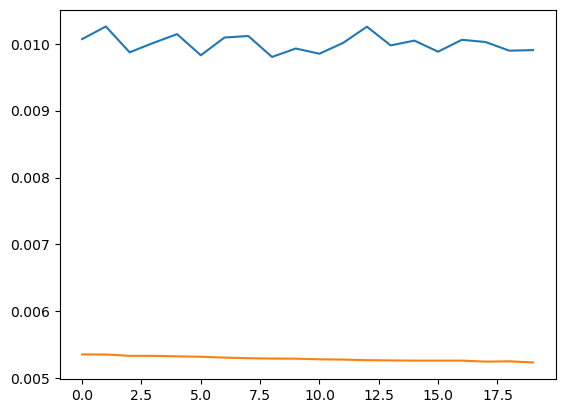

In [130]:
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])

Data sorting and changing format.

In [131]:
preds = np.squeeze(model.predict(map_valid, 1024, verbose=1))


83/83 [==============================] - 1s 9ms/step


In [132]:
def log_max_inv(preds, mx = max_log_y):
    return np.exp(preds * mx)

In [133]:
print(log_max_inv(preds, max_log_y)[0])
print(log_max_inv(y_valid, max_log_y)[0])
print(math.sqrt(np.square(((log_max_inv(preds, max_log_y)[0] - log_max_inv(y_valid, max_log_y)[0])/log_max_inv(y_valid, max_log_y)[0]).mean())))

7214.0737
7955.999999999996
0.09325367892549606


In [134]:
preds_log_max_inv = log_max_inv(preds, max_log_y)
print(preds_log_max_inv)

[ 7214.0737  8765.426   5170.24    7191.5635  5408.262   5215.9766
  6362.501   7704.591   5179.143   6128.159   9666.21    6905.1123
  6524.6797  5437.5234  6977.8843  5122.1733  7548.8647  4845.522
  3669.8208  6317.776  ...  5805.639  19581.35    4358.182   4714.7417
  8112.5327 21719.459   3050.532   4730.3604  4093.5242  8675.856
  5014.3384  3876.8464  3004.4753 14412.875   4633.3315  4403.739
 12468.451   6999.7856  5090.8403  6383.944 ]


In [135]:
y_valid_array =  log_max_inv(np.array(y_valid), max_log_y)
print(y_valid_array)

[ 7956.  8958.  4676.  6913.  6157.  5010.  6723.  8033.  5196.  6413.
 10012.  6619.  6806.  4765.  6973.  5080. 11710.  5088.  3612.  6362. ...
  6218. 20642.  3697.  4220.  6851. 17267.  3102.  2401.  3139.  9643.
  3113.  2646.  2907.  8498.  3821.  3375. 10765.  5035.  4491.  5961.]


#### Final result

The final result is calculated as the root mean square of the difference between the predicted value and the real value, divided by the real value 

In [136]:
print(sqrt(mean(square((preds_log_max_inv - y_valid_array)/y_valid_array))))


0.220310393774384
